<a href="https://colab.research.google.com/github/hebatoallah-yehya1111/Telcom-Churn-ML-Prediction/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import needed library
---

In [340]:
#import needed libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib


# Data Connection
---

In [341]:
# Read the csv file using Pandas
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [342]:
# Show the df
df

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Exploration , Cleaning & Transformation
---





In [343]:
# Show the df Columns
df.columns

Index(['customerID', 'gender', 'Senior_Citizen ', 'Is_Married', 'Dependents',
       'tenure', 'Phone_Service', 'Dual', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [344]:
df.columns = df.columns.str.strip()


In [345]:
df.loc[488]

,488
customerID,4472-LVYGI
gender,Female
Senior_Citizen,0
Is_Married,Yes
Dependents,Yes
tenure,0
Phone_Service,No
Dual,No phone service
Internet_Service,DSL
Online_Security,Yes


In [346]:
#Check the data types and the non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   int64  
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 


We observe that all columns have the correct data types, except for the ``Total_Charges`` column, which should be numerical rather than an object type , and  ``Senior_Citizen`` column, which should be object rather than an int type.


In [347]:
# Turning the total charges column into a numerical column
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
df['Senior_Citizen']=df['Senior_Citizen'].astype(str)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   object 
 3   Is_Married         7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Dual               7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 


After converting the ``Total_Charges``column to a numeric type, we noticed the presence of some null values. Since the number of these null values is small compared to the overall dataset size (7032 non-null values out of 7043), we will drop the rows containing these null values to avoid any negative impact on the analysis.

In [349]:
# drop missing values
df.dropna(inplace=True)



In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7032 non-null   object 
 1   gender             7032 non-null   object 
 2   Senior_Citizen     7032 non-null   object 
 3   Is_Married         7032 non-null   object 
 4   Dependents         7032 non-null   object 
 5   tenure             7032 non-null   int64  
 6   Phone_Service      7032 non-null   object 
 7   Dual               7032 non-null   object 
 8   Internet_Service   7032 non-null   object 
 9   Online_Security    7032 non-null   object 
 10  Online_Backup      7032 non-null   object 
 11  Device_Protection  7032 non-null   object 
 12  Tech_Support       7032 non-null   object 
 13  Streaming_TV       7032 non-null   object 
 14  Streaming_Movies   7032 non-null   object 
 15  Contract           7032 non-null   object 
 16  Paperless_Billing  7032 non-n

# Check Duplicates and Remove them
---

In [351]:
df.duplicated().sum()


0

In [352]:
df

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Removig the identifier of the table
---

In [353]:
# drop customerID
df.drop('customerID', axis=1, inplace=True)


*   The ``customerID`` column is being dropped because it acts as an identifier for each row in the dataset.

*  Including it in the model might lead to overfitting, as the model could learn to rely on this unique identifier rather than generalizing patterns from the other features.

*   Removing this column ensures that the model focuses
 on the relevant features and improves its ability to generalize to new, unseen data.






# Numerical Data Exploration

In [354]:
df.describe()


,tenure,Monthly_Charges,Total_Charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


At this stage, we need to detect and handle outliers.

From my understanding, outliers can arise either from a business perspective or from the data's distribution. In this case, it seems that the numerical values in our dataset do not have predefined limits, so we cannot categorize any values as outliers based on business rules.

In [355]:
# IQR
def AD_IQR(df, col_name):
  q1, q3 = np.quantile(df[col_name], [0.25, 0.75])
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr

  df[f'AD_IQR_' + col_name] = np.where((df[col_name] > upper_limit) | (df[col_name] < lower_limit), 1, 0)
  return df

df=AD_IQR(df, 'tenure')
df=AD_IQR(df, 'Monthly_Charges')
df=AD_IQR(df, 'Total_Charges')

In [356]:
display(df['AD_IQR_tenure'].value_counts())
display(df['AD_IQR_Total_Charges'].value_counts())
display(df['AD_IQR_Total_Charges'].value_counts())

,count
AD_IQR_tenure,
0,7032


,count
AD_IQR_Total_Charges,
0,7032


,count
AD_IQR_Total_Charges,
0,7032


<Axes: xlabel='Total_Charges'>

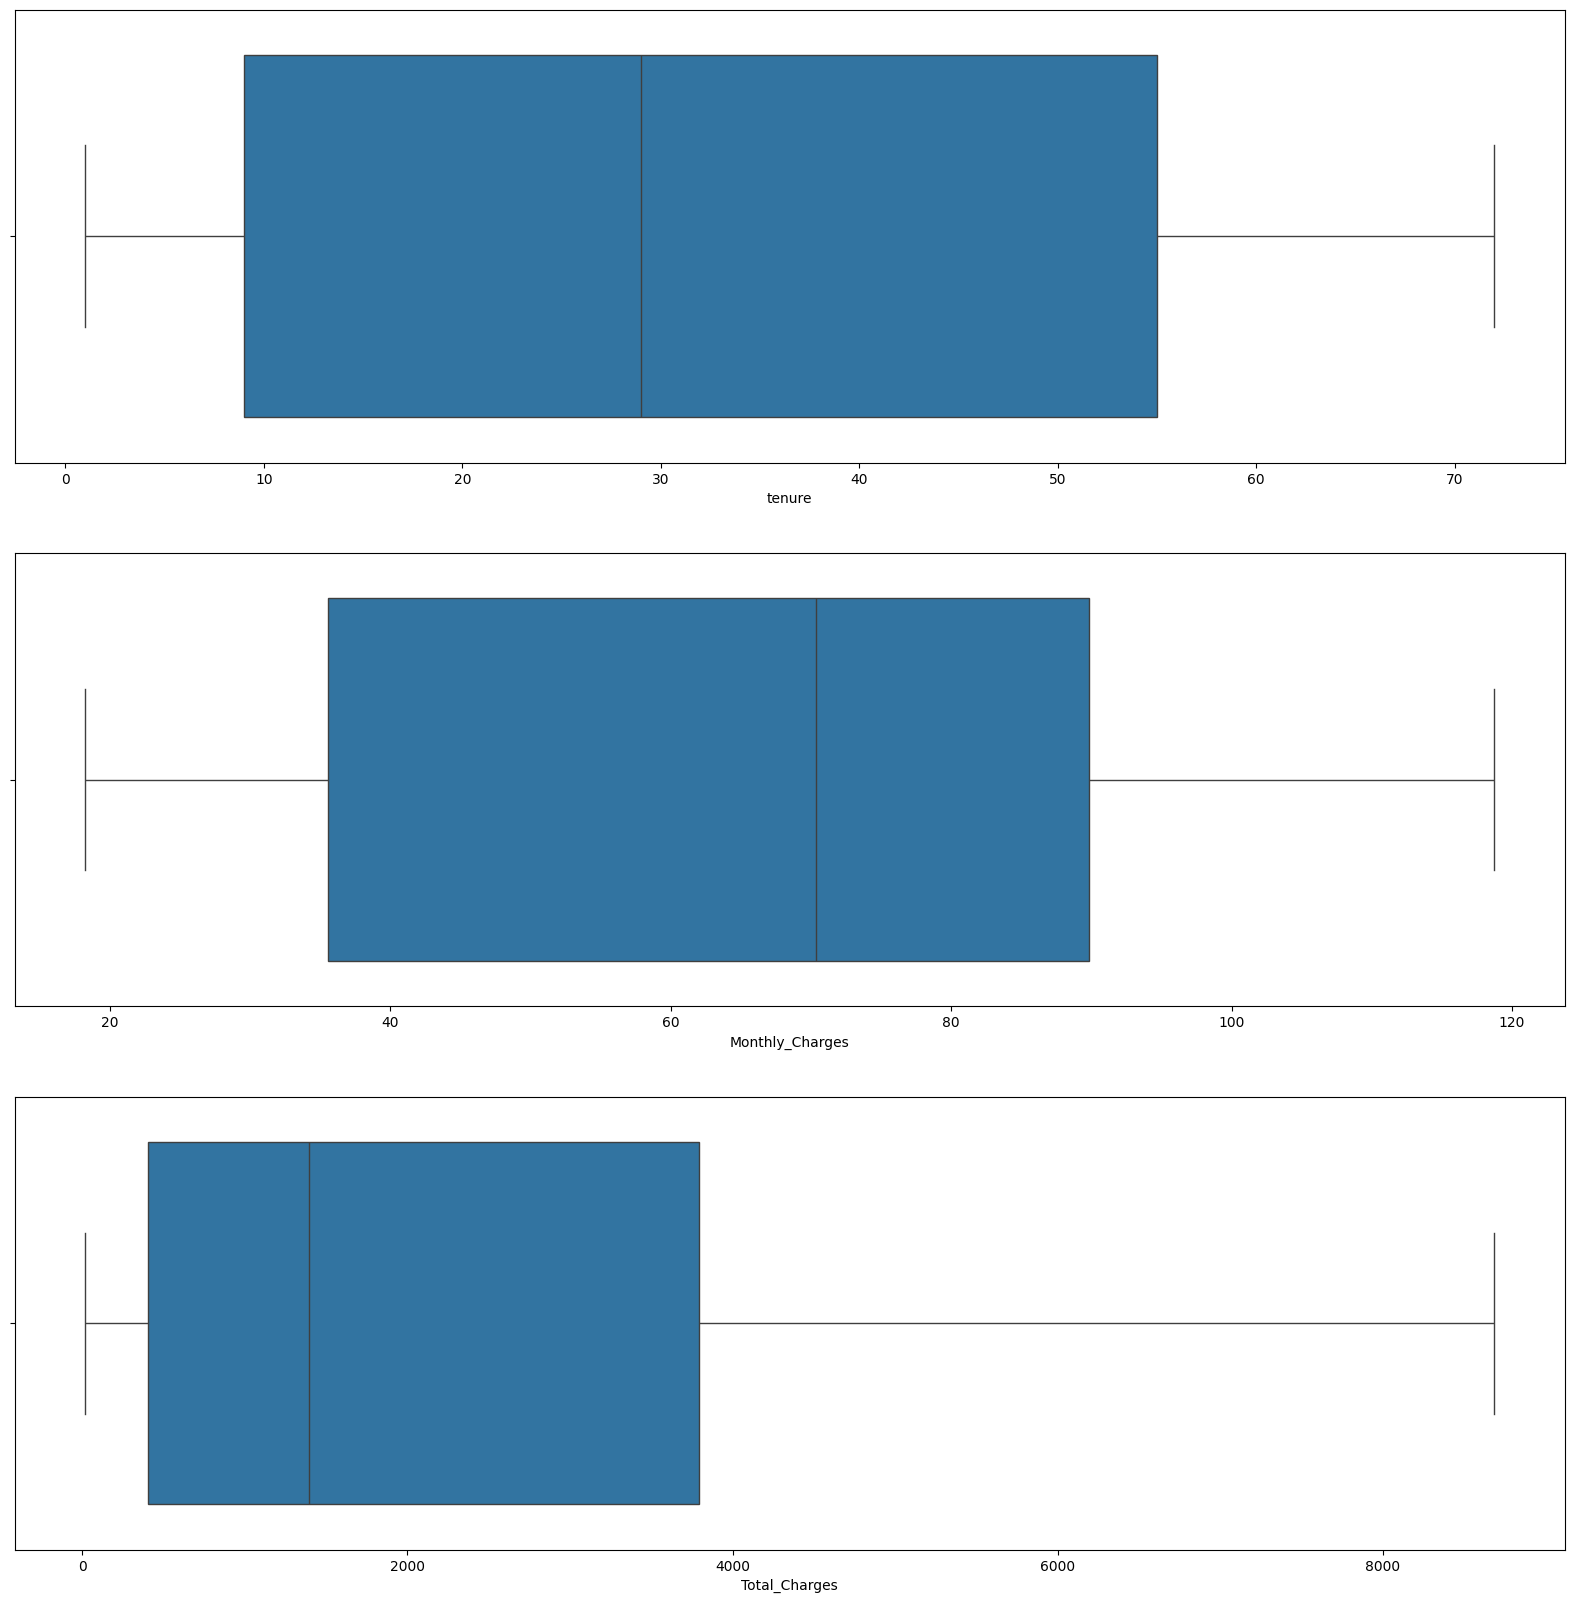

In [357]:
fig, axis = plt.subplots(3,1, figsize = (20,20))

sns.boxplot(data = df, x = 'tenure', ax = axis[0])
sns.boxplot(data = df, x = 'Monthly_Charges', ax = axis[1])
sns.boxplot(data = df, x = 'Total_Charges', ax = axis[2])


We observed that both the IQR method and the box plot analysis indicate the absence of outliers.








In [358]:
def remove_cols_containing_ad(df):
  """Removes columns containing 'AD_' from a DataFrame.

  Args:
    df: pandas DataFrame.

  Returns:
    DataFrame with columns containing 'AD_' removed.
  """
  cols_to_remove = [col for col in df.columns if 'AD_' in col]
  df = df.drop(columns=cols_to_remove)
  return df
df=remove_cols_containing_ad(df)


In [359]:
df

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Categorical Data Exploration


In [360]:
# Loop through the dataset to check unique values for non-numeric columns
for col in df.columns:
    if df[col].dtype not in ['int64', 'float64']:
        print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
Senior_Citizen: ['0' '1']
Is_Married: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone_Service: ['No' 'Yes']
Dual: ['No phone service' 'No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'Yes' 'No internet service']
Online_Backup: ['Yes' 'No' 'No internet service']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['No' 'Yes' 'No internet service']
Streaming_TV: ['No' 'Yes' 'No internet service']
Streaming_Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


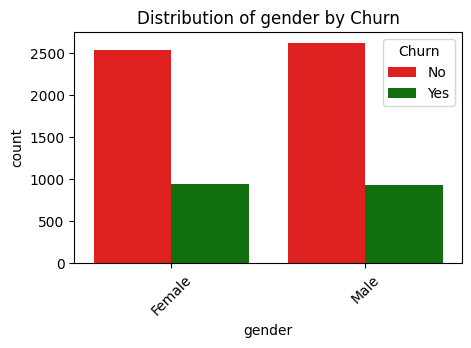

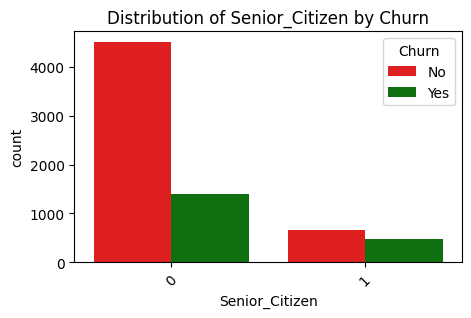

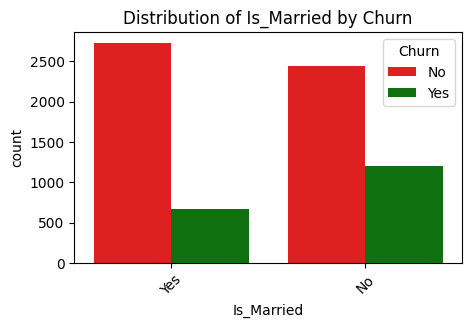

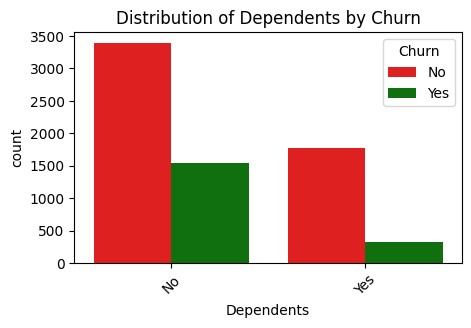

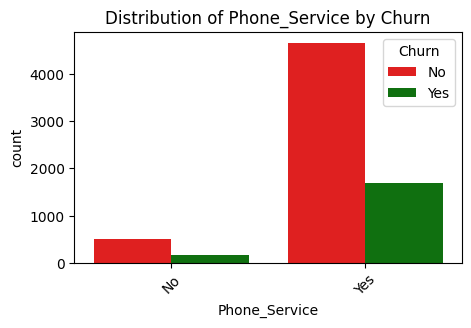

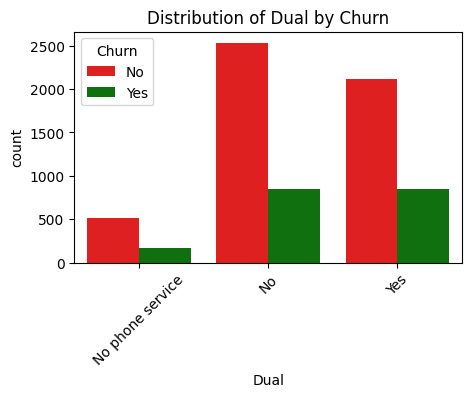

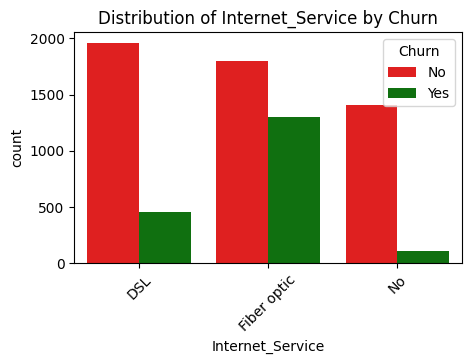

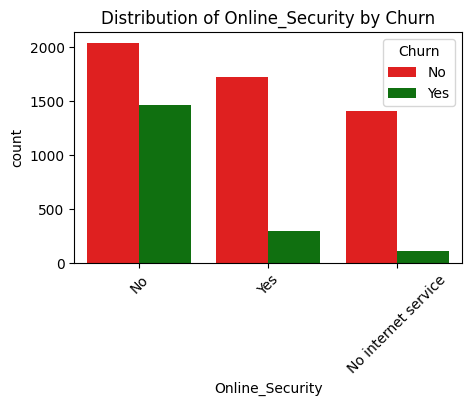

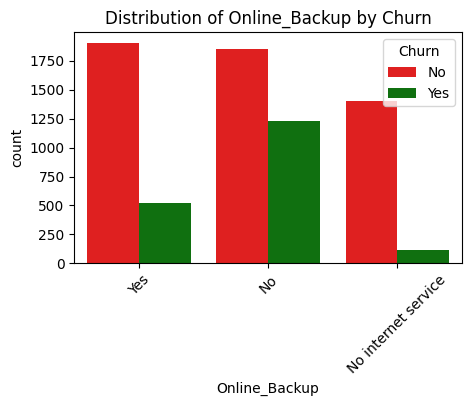

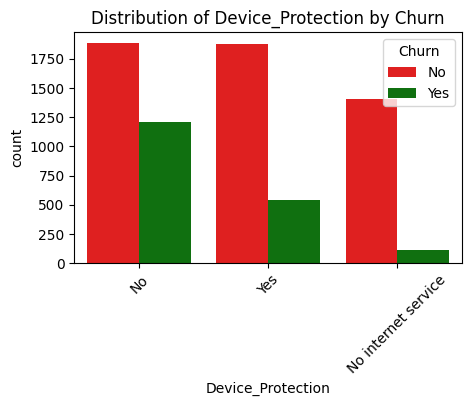

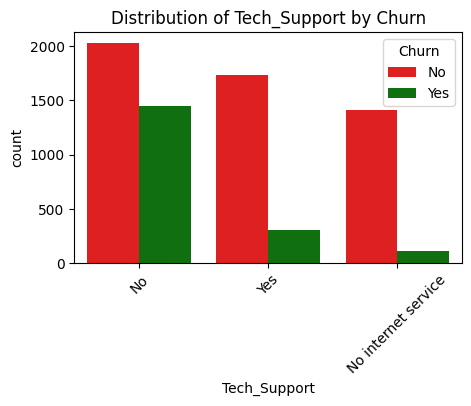

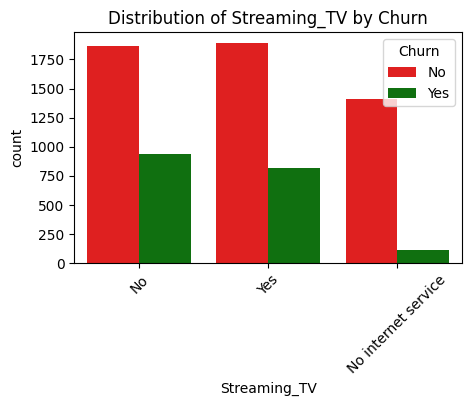

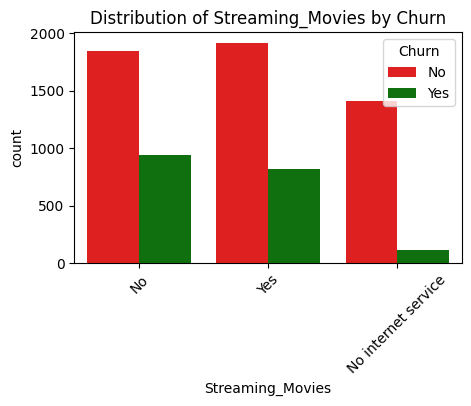

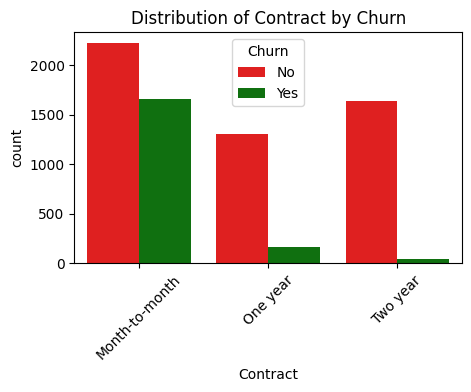

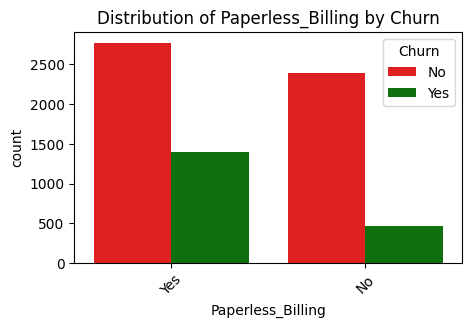

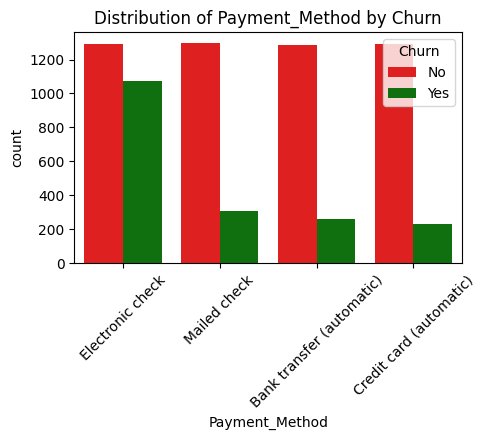

In [361]:
# Define colors for the "Yes" and "No" categories
colors = {'Yes': 'green', 'No': 'red'}

# Define the palette to include keys for binary values (0 and 1)
palette = {0: 'red', 1: 'green'}

# Loop through predictors and create count plots
excluded_columns = ['Churn', 'Total_Charges', 'Monthly_Charges', 'tenure']
for i, predictor in enumerate(df.drop(columns=excluded_columns).columns):
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(f"Distribution of {predictor} by Churn")
    plt.xticks(rotation=45)  # Rotate x-axis labels

    plt.show()

# Check the label balancing

In [362]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


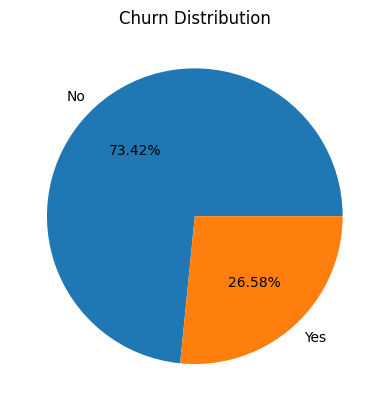

In [363]:
churn_counts = df['Churn'].value_counts()

plt.pie(
    data = churn_counts,
    x = churn_counts,
    labels = churn_counts.index,
    autopct = '%.2f%%'
);

plt.title('Churn Distribution');

We observed that the labels are imbalanced, as shown through both numerical analysis and visual representation. This imbalance will require appropriate handling in subsequent steps to ensure a fair and accurate analysis.

# Data Preprocessing

## Categorical Data Preprocessing

In [364]:
df['Senior_Citizen']=df['Senior_Citizen'].replace({'0':'No', '1':'Yes'})

In [365]:
df

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [366]:
[col for col in df.columns if set(df[col].unique()) <= {'Yes', 'No'}]

['Senior_Citizen',
 'Is_Married',
 'Dependents',
 'Phone_Service',
 'Paperless_Billing',
 'Churn']

In [367]:
# Step 1: Filter categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['gender', 'Senior_Citizen', 'Is_Married', 'Dependents', 'Phone_Service',
       'Dual', 'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn'],
      dtype='object')


In [368]:
# Step 1: Filter categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Step 1: Identify binary columns and categorical columns
binary_columns = [col for col in categorical_columns if set(df[col].unique()) <= {'Yes', 'No'}]
non_binary_columns  = [col for col in categorical_columns if col not in binary_columns]

# Step 2: Apply LabelEncoder for binary columns
le = LabelEncoder()
for col in binary_columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])

joblib.dump(le, 'label_encoder.pkl')



# Step 3: Apply OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #Set sparse_output=False
encoder.fit(df[non_binary_columns]) # Fit using non_binary_columns
joblib.dump(encoder, 'one_hot_encoder.pkl')
encoded = encoder.transform(df[non_binary_columns]) # Fit using non_binary_columns

# Step 4: Add one-hot encoded columns back to the DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(non_binary_columns) # Get feature names using non_binary_columns
)

#Join encoded_df with original df
df = df.drop(columns=non_binary_columns)  # Drop non_binary_columns
df = df.reset_index(drop=True) # Reset index for both DataFrames
encoded_df = encoded_df.reset_index(drop=True) # Reset index for both DataFrames
df = pd.concat([df, encoded_df], axis=1)



Categorical columns: Index(['gender', 'Senior_Citizen', 'Is_Married', 'Dependents', 'Phone_Service',
       'Dual', 'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn'],
      dtype='object')


In [369]:
df.columns

Index(['Senior_Citizen', 'Is_Married', 'Dependents', 'tenure', 'Phone_Service',
       'Paperless_Billing', 'Monthly_Charges', 'Total_Charges', 'Churn',
       'gender_Female', 'gender_Male', 'Dual_No', 'Dual_No phone service',
       'Dual_Yes', 'Internet_Service_DSL', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Online_Security_No',
       'Online_Security_No internet service', 'Online_Security_Yes',
       'Online_Backup_No', 'Online_Backup_No internet service',
       'Online_Backup_Yes', 'Device_Protection_No',
       'Device_Protection_No internet service', 'Device_Protection_Yes',
       'Tech_Support_No', 'Tech_Support_No internet service',
       'Tech_Support_Yes', 'Streaming_TV_No',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Movies_No', 'Streaming_Movies_No internet service',
       'Streaming_Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment_Method_Bank transfer (automati

In [370]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [371]:
df

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,gender_Female,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,56.95,1889.50,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,53.85,108.15,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,42.30,1840.75,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,1,70.70,151.65,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,84.80,1990.50,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0,1,1,72,1,1,103.20,7362.90,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0,1,1,11,0,1,29.60,346.45,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,0,4,1,1,74.40,306.60,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [372]:
df.columns

Index(['Senior_Citizen', 'Is_Married', 'Dependents', 'tenure', 'Phone_Service',
       'Paperless_Billing', 'Monthly_Charges', 'Total_Charges', 'Churn',
       'gender_Female', 'gender_Male', 'Dual_No', 'Dual_No phone service',
       'Dual_Yes', 'Internet_Service_DSL', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Online_Security_No',
       'Online_Security_No internet service', 'Online_Security_Yes',
       'Online_Backup_No', 'Online_Backup_No internet service',
       'Online_Backup_Yes', 'Device_Protection_No',
       'Device_Protection_No internet service', 'Device_Protection_Yes',
       'Tech_Support_No', 'Tech_Support_No internet service',
       'Tech_Support_Yes', 'Streaming_TV_No',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Movies_No', 'Streaming_Movies_No internet service',
       'Streaming_Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment_Method_Bank transfer (automati

In [373]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
smote = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# data into train , validation and test split
X_train, X_test_validate, y_train, y_test_validate = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42,shuffle=True)
X_validate, X_test , y_validate, y_test = train_test_split(X_test_validate, y_test_validate, test_size=0.5, random_state=42,shuffle=True)

In [374]:
X_resampled

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,0,0,34,1,0,56.950000,1889.500000,0.000000,1.000000,...,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.0
1,0,0,0,45,0,0,42.300000,1840.750000,0.000000,1.000000,...,1.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0
2,0,0,1,62,1,0,56.150000,3487.950000,0.000000,1.000000,...,1.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.0
3,0,0,0,25,1,1,105.500000,2686.050000,0.000000,1.000000,...,0.000000,0.0,1.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0
4,0,1,1,69,1,0,113.250000,7895.150000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,0,1,0,35,1,1,100.371406,3652.711428,0.978018,0.021982,...,1.000000,0.0,0.000000,1.0,0.0,0.0,0.978018,0.000000,0.021982,0.0
5866,1,0,0,55,1,1,101.006833,5509.586153,1.000000,0.000000,...,0.000000,0.0,1.000000,0.0,1.0,0.0,0.211965,0.000000,0.788035,0.0
5867,0,0,0,11,1,1,91.908973,1118.784208,1.000000,0.000000,...,0.000000,0.0,1.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0
5868,0,0,0,2,1,1,78.950982,153.238826,0.854371,0.145629,...,1.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.0


In [375]:

scaler = MinMaxScaler()
# Fit & Transform Data
scaler.fit(X_train[['tenure', 'Monthly_Charges','Total_Charges']])
joblib.dump(scaler, 'scalar.pkl')
X_train[['tenure', 'Monthly_Charges','Total_Charges']]  = scaler.transform(X_train[['tenure', 'Monthly_Charges','Total_Charges']])
X_validate[['tenure', 'Monthly_Charges','Total_Charges']] = scaler.transform(X_validate[['tenure', 'Monthly_Charges','Total_Charges']])
X_test[['tenure', 'Monthly_Charges', 'Total_Charges']] = scaler.transform(X_test[['tenure', 'Monthly_Charges', 'Total_Charges']])

type(scaler)


sklearn.preprocessing._data.MinMaxScaler

In [376]:
X_validate

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
3114,0,1,1,0.309859,1,0,0.653214,0.220602,1.000000,0.000000,...,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
5318,0,0,0,0.521127,1,1,0.771810,0.438590,0.000000,1.000000,...,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0
5614,0,1,0,0.704225,1,0,0.821907,0.592663,0.000000,1.000000,...,0.0,0.0,1.0,0.836271,0.163729,0.0,0.0,0.0,1.0,0.0
3997,0,0,0,0.056338,1,0,0.702529,0.056612,0.178169,0.821831,...,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
4190,0,0,0,0.478873,1,1,0.673581,0.353050,0.533701,0.466299,...,1.0,0.0,0.0,0.533701,0.466299,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0,1,1,0.971831,1,1,0.507723,0.569103,1.000000,0.000000,...,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0
3662,0,1,1,0.338028,1,1,0.706029,0.275496,1.000000,0.000000,...,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2292,0,1,0,0.760563,1,1,0.716492,0.574332,1.000000,0.000000,...,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0
757,0,0,0,0.084507,1,0,0.012456,0.012863,0.000000,1.000000,...,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0


In [377]:
X_test

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
5839,0,0,0,0.253521,0,1,0.310694,0.103273,0.361666,0.638334,...,0.000000,0.0,1.000000,0.361666,0.638334,0.0,0.638334,0.000000,0.361666,0.000000
802,0,1,0,0.380282,1,0,0.780767,0.312544,0.000000,1.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
1839,1,0,0,0.633803,1,1,0.506726,0.379497,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
4384,0,0,0,0.014085,1,1,0.602706,0.015381,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.834947,0.165053
5086,0,0,0,0.014085,1,0,0.499810,0.013564,0.340004,0.659996,...,0.659996,0.0,0.340004,1.000000,0.000000,0.0,0.000000,0.659996,0.000000,0.340004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0,1,0,0.943662,1,1,0.611360,0.644552,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
5549,0,0,0,0.056338,1,1,0.727921,0.051098,0.707751,0.292249,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
92,0,0,0,0.422535,0,1,0.314898,0.176027,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
1533,0,0,0,0.549296,1,0,0.563528,0.346237,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000


In [378]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Logistic Regression Classifier

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

#Evaluate Logistic regression
lr_accuracy= lr_model.score(X_validate, y_validate)
print("Logistic regression Validation data set Accuracy:", lr_accuracy)

# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt_model.fit(X_train, y_train)
#Evaluate Logistic regression
dt_accuracy= dt_model.score(X_validate, y_validate)
print("Decision Tree Validation data set Accuracy:", dt_accuracy)

# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_classifier.fit(X_train, y_train)
# Evaluate Random Forest
rf_accuracy= rf_classifier.score(X_validate, y_validate)
print("Random Forest Validation data set Accuracy:", rf_accuracy)

# 4. Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
# Evaluate SVM
svm_accuracy = svm_classifier.score(X_validate, y_validate)
print("SVM Validation data set Accuracy:", svm_accuracy)

# 5. KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_classifier.fit(X_train, y_train)
# Evaluate KNN
knn_accuracy = knn_classifier.score(X_validate, y_validate)
print("KNN Validation data set Accuracy:", knn_accuracy)


# 6. XGBoost Classifier
xgboost_classifier = XGBClassifier(random_state=0,
                                    n_estimators=200,
                                    max_depth=3,
                                    reg_lambda=0,
                                    min_split_loss=1,
                                    learning_rate=0.5)
xgboost_classifier.fit(X_train, y_train)
# Evaluate XGBoost Classifier
xgboost_accuracy = xgboost_classifier.score(X_validate, y_validate)
print("XGBOOST Validation data set Accuracy:", xgboost_accuracy)


Logistic regression Validation data set Accuracy: 0.9113636363636364
Decision Tree Validation data set Accuracy: 0.9136363636363637
Random Forest Validation data set Accuracy: 0.95
SVM Validation data set Accuracy: 0.9261363636363636
KNN Validation data set Accuracy: 0.8965909090909091
XGBOOST Validation data set Accuracy: 0.9545454545454546


As we see the xgboost gives the highest accuracy while apply on a validation dataset

In [379]:
from sklearn.metrics import f1_score

print("F1-scores of the models:")

lr_predicted_labels = lr_model.predict(X_validate)
print("Logistic regression:", f1_score(y_validate, lr_predicted_labels))

dt_predicted_labels = dt_model.predict(X_validate)
print("Decision Tree:", f1_score(y_validate, lr_predicted_labels))

rf_predicted_labels = rf_classifier.predict(X_validate)
print("Random Forest:", f1_score(y_validate, rf_predicted_labels))

svm_predicted_labels = svm_classifier.predict(X_validate)
print("SVM:", f1_score(y_validate, svm_predicted_labels))

knn_predicted_labels = knn_classifier.predict(X_validate)
print("KNN:", f1_score(y_validate, knn_predicted_labels))

xgboost_predicted_labels = xgboost_classifier.predict(X_validate)
print("XGBOOST:", f1_score(y_validate, xgboost_predicted_labels))


F1-scores of the models:
Logistic regression: 0.9190871369294605
Decision Tree: 0.9190871369294605
Random Forest: 0.9541666666666667
SVM: 0.932920536635707
KNN: 0.9099901088031652
XGBOOST: 0.9585062240663901


In [380]:
X_validate

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
3114,0,1,1,0.309859,1,0,0.653214,0.220602,1.000000,0.000000,...,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
5318,0,0,0,0.521127,1,1,0.771810,0.438590,0.000000,1.000000,...,0.0,0.0,1.0,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0
5614,0,1,0,0.704225,1,0,0.821907,0.592663,0.000000,1.000000,...,0.0,0.0,1.0,0.836271,0.163729,0.0,0.0,0.0,1.0,0.0
3997,0,0,0,0.056338,1,0,0.702529,0.056612,0.178169,0.821831,...,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
4190,0,0,0,0.478873,1,1,0.673581,0.353050,0.533701,0.466299,...,1.0,0.0,0.0,0.533701,0.466299,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0,1,1,0.971831,1,1,0.507723,0.569103,1.000000,0.000000,...,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0
3662,0,1,1,0.338028,1,1,0.706029,0.275496,1.000000,0.000000,...,0.0,0.0,1.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2292,0,1,0,0.760563,1,1,0.716492,0.574332,1.000000,0.000000,...,0.0,0.0,1.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0
757,0,0,0,0.084507,1,0,0.012456,0.012863,0.000000,1.000000,...,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0


In [381]:
X_test

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
5839,0,0,0,0.253521,0,1,0.310694,0.103273,0.361666,0.638334,...,0.000000,0.0,1.000000,0.361666,0.638334,0.0,0.638334,0.000000,0.361666,0.000000
802,0,1,0,0.380282,1,0,0.780767,0.312544,0.000000,1.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
1839,1,0,0,0.633803,1,1,0.506726,0.379497,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
4384,0,0,0,0.014085,1,1,0.602706,0.015381,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.834947,0.165053
5086,0,0,0,0.014085,1,0,0.499810,0.013564,0.340004,0.659996,...,0.659996,0.0,0.340004,1.000000,0.000000,0.0,0.000000,0.659996,0.000000,0.340004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0,1,0,0.943662,1,1,0.611360,0.644552,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
5549,0,0,0,0.056338,1,1,0.727921,0.051098,0.707751,0.292249,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
92,0,0,0,0.422535,0,1,0.314898,0.176027,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
1533,0,0,0,0.549296,1,0,0.563528,0.346237,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000


In [382]:
X_test

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
5839,0,0,0,0.253521,0,1,0.310694,0.103273,0.361666,0.638334,...,0.000000,0.0,1.000000,0.361666,0.638334,0.0,0.638334,0.000000,0.361666,0.000000
802,0,1,0,0.380282,1,0,0.780767,0.312544,0.000000,1.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
1839,1,0,0,0.633803,1,1,0.506726,0.379497,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
4384,0,0,0,0.014085,1,1,0.602706,0.015381,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.834947,0.165053
5086,0,0,0,0.014085,1,0,0.499810,0.013564,0.340004,0.659996,...,0.659996,0.0,0.340004,1.000000,0.000000,0.0,0.000000,0.659996,0.000000,0.340004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,0,1,0,0.943662,1,1,0.611360,0.644552,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
5549,0,0,0,0.056338,1,1,0.727921,0.051098,0.707751,0.292249,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
92,0,0,0,0.422535,0,1,0.314898,0.176027,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
1533,0,0,0,0.549296,1,0,0.563528,0.346237,1.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000


In [383]:

print("Testing data set Accuracy")

#Evaluate Logistic regression
lr_accuracy= lr_model.score(X_test, y_test)
print("Logistic regression: ", lr_accuracy)

#Evaluate Logistic regression
dt_accuracy= dt_model.score(X_test, y_test)
print("Decision Tree: ", dt_accuracy)

# Evaluate Random Forest
rf_accuracy= rf_classifier.score(X_test, y_test)
print("Random Forest: ", rf_accuracy)

# Evaluate SVM
svm_accuracy = svm_classifier.score(X_test, y_test)
print("SVM Validation: ", svm_accuracy)


# Evaluate KNN
knn_accuracy = knn_classifier.score(X_test, y_test)
print("KNN Validation: ", knn_accuracy)


# Evaluate XGBoost Classifier
xgboost_accuracy = xgboost_classifier.score(X_test, y_test)
print("XGBOOST: ", xgboost_accuracy)


Testing data set Accuracy
Logistic regression:  0.9194097616345063
Decision Tree:  0.9103291713961408
Random Forest:  0.9466515323496028
SVM Validation:  0.9228149829738933
KNN Validation:  0.9035187287173666
XGBOOST:  0.9523269012485811


In [384]:
joblib.dump(xgboost_classifier, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [385]:
import pickle
with open('xgboost_model.pkl', 'rb') as f:
    ML_model = pickle.load(f)
    print(type(ML_model))

with open('scalar.pkl', 'rb') as f:
    scaler = joblib.load(f)
    print(type(scaler))

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = joblib.load(f)
    print(type(label_encoder))

with open('one_hot_encoder.pkl', 'rb') as f:
    one_hot_encoder = joblib.load(f)
    print(type(one_hot_encoder))

<class 'xgboost.sklearn.XGBClassifier'>
<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.preprocessing._label.LabelEncoder'>
<class 'sklearn.preprocessing._encoders.OneHotEncoder'>


In [386]:
df

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,gender_Female,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,56.95,1889.50,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,53.85,108.15,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,42.30,1840.75,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,1,70.70,151.65,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,84.80,1990.50,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0,1,1,72,1,1,103.20,7362.90,0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0,1,1,11,0,1,29.60,346.45,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,0,4,1,1,74.40,306.60,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [399]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [400]:
df.loc[1]

,1
customerID,5575-GNVDE
gender,Male
Senior_Citizen,0
Is_Married,No
Dependents,No
tenure,34
Phone_Service,Yes
Dual,No
Internet_Service,DSL
Online_Security,Yes


In [401]:
# Create a DataFrame from the CSV
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['Senior_Citizen']=df['Senior_Citizen '].replace({0:'No', 1:'Yes'})
df.drop('Senior_Citizen ', axis=1, inplace=True)

# Select the first row (or any other row by changing the index)
row_df = df.iloc[1:2].drop(columns=['customerID'])
df = row_df.copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert to numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['Monthly_Charges'] = pd.to_numeric(df['Monthly_Charges'], errors='coerce')
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

# Filter categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Identify binary columns and non-binary categorical columns
binary_columns = [ 'Dependents','Is_Married','Paperless_Billing','Phone_Service','Senior_Citizen',"Churn"]
non_binary_columns = [col for col in categorical_columns if col not in binary_columns]

# Print out the columns for debugging
print("Binary columns:", binary_columns)
print("Non-binary columns:", non_binary_columns)

# Apply LabelEncoder for binary columns
# Move the label encoding outside the loop
for col in binary_columns:
    df[col] = label_encoder.transform(df[col])
    # Convert to int after Label Encoding
    df[col] = df[col].astype(int)


# Ensure we only pass non-binary columns to one-hot encoder
if non_binary_columns:
    # Transform the non-binary categorical columns
    encoded = one_hot_encoder.transform(df[non_binary_columns])

    # Get feature names (with fallback for different sklearn versions)
    try:
        encoded_feature_names = one_hot_encoder.get_feature_names_out(non_binary_columns)
    except AttributeError:
        encoded_feature_names = one_hot_encoder.get_feature_names(non_binary_columns)

    # Create DataFrame with encoded columns
    encoded_df = pd.DataFrame(encoded, columns=encoded_feature_names, index=df.index)

    # Drop original non-binary columns and concatenate encoded columns
    df = df.drop(columns=non_binary_columns)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(['Churn'], inplace=True,axis=1)


numerical_cols = ['tenure', 'Monthly_Charges', 'Total_Charges']
df[numerical_cols] = scaler.transform(df[numerical_cols])

# Reorder columns to match training data
df = df[ML_model.get_booster().feature_names] # Reorder the columns of df to match the model's expected feature order


# Make predictions
predictions = ML_model.predict(df)
print("Predictions:", predictions)

Categorical columns: Index(['gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
       'Internet_Service', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn',
       'Senior_Citizen'],
      dtype='object')
Binary columns: ['Dependents', 'Is_Married', 'Paperless_Billing', 'Phone_Service', 'Senior_Citizen', 'Churn']
Non-binary columns: ['gender', 'Dual', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method']
Predictions: [0]


In [402]:
df

,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,gender_Female,gender_Male,...,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
1,0,0,0,0.464789,1,0,0.38565,0.219342,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
